In [12]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
from astropy.constants import c
from astropy import constants as const
import astropy.units as u
from scipy import special


def weight(n):
    return 2 * n**2

def boltzmann(n1, n2, eV, T):
    k = 8.6173303e-5  # Boltzmann constant in eV/K
    g_n = weight(n2) / weight(n1) * np.exp(-eV / (k * T))
    return g_n

def CIV(T):
    sigma_Lya = 5.9e-14 * (T / 1e4) ** (-1/2)
    sigma_CIV = (0.19 / 0.4164) * sigma_Lya * (12) ** (0.5)
    N_CIV_0 = 1 / sigma_CIV
    return sigma_Lya, sigma_CIV, N_CIV_0

sig_ly, sig_c, N_CIV_0 = CIV(1e5)
print("{:.2e}".format(N_CIV_0))

def tau(sig_c, x):
    return sig_c * x

rr = np.arange(13, 18, 1)
ee = [0]
em = np.arange(50,650,50)
em = np.append([1,10],em)
Ran = np.arange(20,100,10)
Ran = np.append(118,Ran)
Ran_1 = np.arange(100,500,50)
Ran = np.append(Ran,Ran_1)
atom = [32]


C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm

C_IV_K_wo = 1548.187 # cm
C_IV_H_wo = 1550.772  # cm

cc = c.to(u.cm / u.s).value
v_th = 11.7673179819719e5  # cm/s

K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952

directory_1 = '~/RT/C_IV/code_tes/data_ran/'

cc_k = c.to(u.km / u.s).value

def function(sigma,lam,lam_k,lam_h):
    tv_k = ((lam-lam_k) / lam_k ) * cc_k
    tv_h = ((lam-lam_h) / lam_h ) * cc_k
    tk = (tv_k)**2 / sigma**2
    th = (tv_h)**2 / sigma**2
    fx = (1 / np.sqrt(2*np.pi*sigma**2))  *(2*np.exp(-tk/2) + np.exp(-th/2) )
    f0 = fx[np.argmax(fx)]
    return fx , f0
Ran
# plt.plot(del_V_space_g,yy_g)

3.39e+13


array([118,  20,  30,  40,  50, 100, 150, 200, 250, 300, 350, 400, 450])

In [13]:
nnf= 0
for a , index in enumerate(rr):
    for b, expand in enumerate(ee):
        if expand == 0 :
            expand_v = '000'
            num_ev = 0 
        # elif expand == 50:
        #     expand_v = expand*10
        #     num_ev = 1
        else: 
            num_ev = 2
            expand_v = expand
        for c, emit in enumerate(em):
            if emit == 1 :
                 emit_v = 100
                 num_emit = 0

            elif emit < 100 :
                emit_v = int(emit*10)
                num_emit = 1
            else : 
                emit_v = emit
                num_emit = 2

            for d, ran in enumerate(Ran):
                if ran < 100 :
                    ran_v = int(ran*10)
                    num_ran_v= 1
                elif ran == 118:
                    ran_v = ran
                    num_ran_v= 1
                else :
                    ran_v = ran
                    num_ran_v = 2
                
                path_sp_1 = f'{directory_1}N_atom320E+{index}_Vexp{expand_v}E+0{num_ev}_Vemit{emit_v}E+0{num_emit}_tauD000E+00_Vran{ran_v}E+0{num_ran_v}spec_com.dat'         
                try:
                    data_sp_1 = pd.read_csv(path_sp_1, sep='\s+', header=None)
                except FileNotFoundError:
                    print(f"파일을 찾을 수 없습니다: {path_sp_1}")
                    nnf+=1
                    continue 

                
                sp_dlam_1 = data_sp_1[0].to_numpy()
                globals()[f'Lambda_{ran_v}_{index}_{expand}_{emit}'] =   sp_dlam_1
                sp_1 = data_sp_1[1].to_numpy()

                indices_K_1 = np.where(sp_dlam_1 <= 1550)[0]
                indices_H_1 = np.where(sp_dlam_1 > 1550)[0]

                sp_dlam_K = sp_dlam_1[indices_K_1]
                sp_dlam_H = sp_dlam_1[indices_H_1]

                dlam_k = sp_dlam_K[1]-sp_dlam_K[0]
                dlam_h = sp_dlam_H[1]-sp_dlam_H[0]
                dlam_sp =sp_dlam_1[1] -sp_dlam_1[0]
                # print(dlam_k ,dlam_h,dlam_sp)

                sp_K = sp_1[indices_K_1]
                sp_H = sp_1[indices_H_1]

                if len(sp_K) == 0 or len(sp_H) == 0:
                    print(f"데이터 부족: {path_sp_1}")
                    continue

                del_V_space = (sp_dlam_1 / C_IV_K_wo  - 1) * cc / 1e5  # km/s

                lam_c = (C_IV_H_wo+C_IV_K_wo) / 2
                # print(sep_point)
                indices_K_sp = np.where(sp_dlam_1 <= lam_c )[0]
                indices_H_sp = np.where(sp_dlam_1> lam_c)[0]

                int_Vel_K = del_V_space[indices_K_sp]
                int_Vel_H = del_V_space[indices_H_sp]

                int_flux_K = sp_1[indices_K_sp]
                int_flux_H = sp_1[indices_H_sp]

                delta_lam_K = sp_dlam_1[indices_K_sp]
                delta_lam_H = sp_dlam_1[indices_H_sp]
                globals()[f'delta_lam_K_{ran}_{index}_{expand}_{emit}'] = delta_lam_K
                globals()[f'delta_lam_H_{ran}_{index}_{expand}_{emit}'] = delta_lam_H  


                globals()[f'I_K_dv_{ran}_{index}_{expand}_{emit}'] = int_Vel_K 
                globals()[f'I_K_f_{ran}_{index}_{expand}_{emit}'] = int_flux_K

                globals()[f'I_H_dv_{ran}_{index}_{expand}_{emit}'] = int_Vel_H  
                globals()[f'I_H_f_{ran}_{index}_{expand}_{emit}'] = int_flux_H     
print(nnf)       

파일을 찾을 수 없습니다: ~/RT/C_IV/code_tes/data_ran/N_atom320E+13_Vexp000E+00_Vemit100E+00_tauD000E+00_Vran250E+02spec_com.dat
파일을 찾을 수 없습니다: ~/RT/C_IV/code_tes/data_ran/N_atom320E+13_Vexp000E+00_Vemit100E+00_tauD000E+00_Vran300E+02spec_com.dat
파일을 찾을 수 없습니다: ~/RT/C_IV/code_tes/data_ran/N_atom320E+13_Vexp000E+00_Vemit100E+00_tauD000E+00_Vran350E+02spec_com.dat
파일을 찾을 수 없습니다: ~/RT/C_IV/code_tes/data_ran/N_atom320E+13_Vexp000E+00_Vemit100E+01_tauD000E+00_Vran250E+02spec_com.dat
파일을 찾을 수 없습니다: ~/RT/C_IV/code_tes/data_ran/N_atom320E+13_Vexp000E+00_Vemit100E+01_tauD000E+00_Vran300E+02spec_com.dat
파일을 찾을 수 없습니다: ~/RT/C_IV/code_tes/data_ran/N_atom320E+13_Vexp000E+00_Vemit100E+01_tauD000E+00_Vran350E+02spec_com.dat
파일을 찾을 수 없습니다: ~/RT/C_IV/code_tes/data_ran/N_atom320E+13_Vexp000E+00_Vemit500E+01_tauD000E+00_Vran250E+02spec_com.dat
파일을 찾을 수 없습니다: ~/RT/C_IV/code_tes/data_ran/N_atom320E+13_Vexp000E+00_Vemit500E+01_tauD000E+00_Vran300E+02spec_com.dat
파일을 찾을 수 없습니다: ~/RT/C_IV/code_tes/data_ran/N_atom320E+13

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

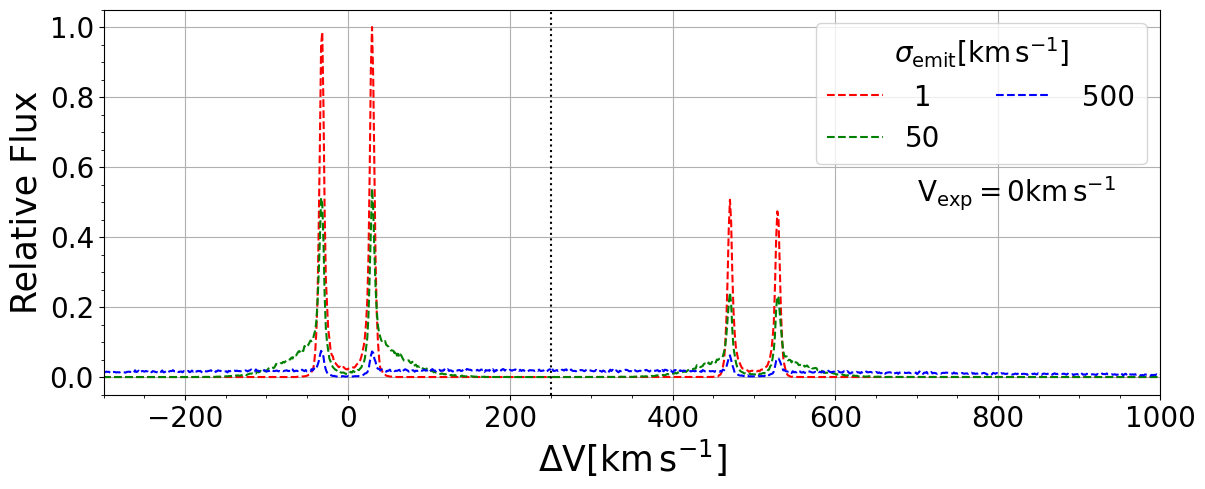

In [23]:
fig = plt.figure(1,figsize=(30,5))

plt.subplot(121)
ran_v,index, expand = 118,16,0
emit_n = 1

normal = max(globals()[f'I_K_f_{ran_v}_{index}_{expand}_{emit_n}'])
plt.plot(globals()[f'I_K_dv_{ran_v}_{index}_{expand}_{emit_n}'] ,globals()[f'I_K_f_{ran_v}_{index}_{expand}_{emit_n}']/normal,'r--',label=f' {emit_n}')
plt.plot(globals()[f'I_H_dv_{ran_v}_{index}_{expand}_{emit_n}'],globals()[f'I_H_f_{ran_v}_{index}_{expand}_{emit_n}']/normal,'r--')

emit_n = 50
plt.plot(globals()[f'I_K_dv_{ran_v}_{index}_{expand}_{emit_n}'] ,globals()[f'I_K_f_{ran_v}_{index}_{expand}_{emit_n}']/ normal ,'g--',label=f'{emit_n}')
plt.plot(globals()[f'I_H_dv_{ran_v}_{index}_{expand}_{emit_n}'],globals()[f'I_H_f_{ran_v}_{index}_{expand}_{emit_n}']/ normal,'g--')

emit_n = 500
plt.plot(globals()[f'I_K_dv_{ran_v}_{index}_{expand}_{emit_n}'] ,globals()[f'I_K_f_{ran_v}_{index}_{expand}_{emit_n}']/ normal,'b--',label=f' {emit_n}')
plt.plot(globals()[f'I_H_dv_{ran_v}_{index}_{expand}_{emit_n}'] ,globals()[f'I_H_f_{ran_v}_{index}_{expand}_{emit_n}']/ normal,'b--')



vv = ((C_IV_H_wo/C_IV_K_wo-1)*cc_k /2)
plt.axvline(vv ,ymin=0,ymax=10,color='k',linestyle=':')
plt.xlim(-300, 1000)
plt.minorticks_on()
# plt.xlim(-1500,1500)
plt.grid(True)
plt.legend(loc='upper right',fontsize=20,ncol=2,title=r'$\sigma_{{\rm emit}} [\rm km \, s^{{-1}} ]$',title_fontsize=20)
plt.xlabel(r'$\Delta \rm V [\rm km \, s^{-1}]$',fontsize=25)
plt.ylabel(r'Relative Flux',fontsize=25)
plt.text(700,0.5,f'$\\rm V_{{\\rm exp}} = {expand} \\rm km \\, s^{{-1}}$',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.savefig(r'/home/jin/바탕화면/vexp.pdf',bbox_inches='tight')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

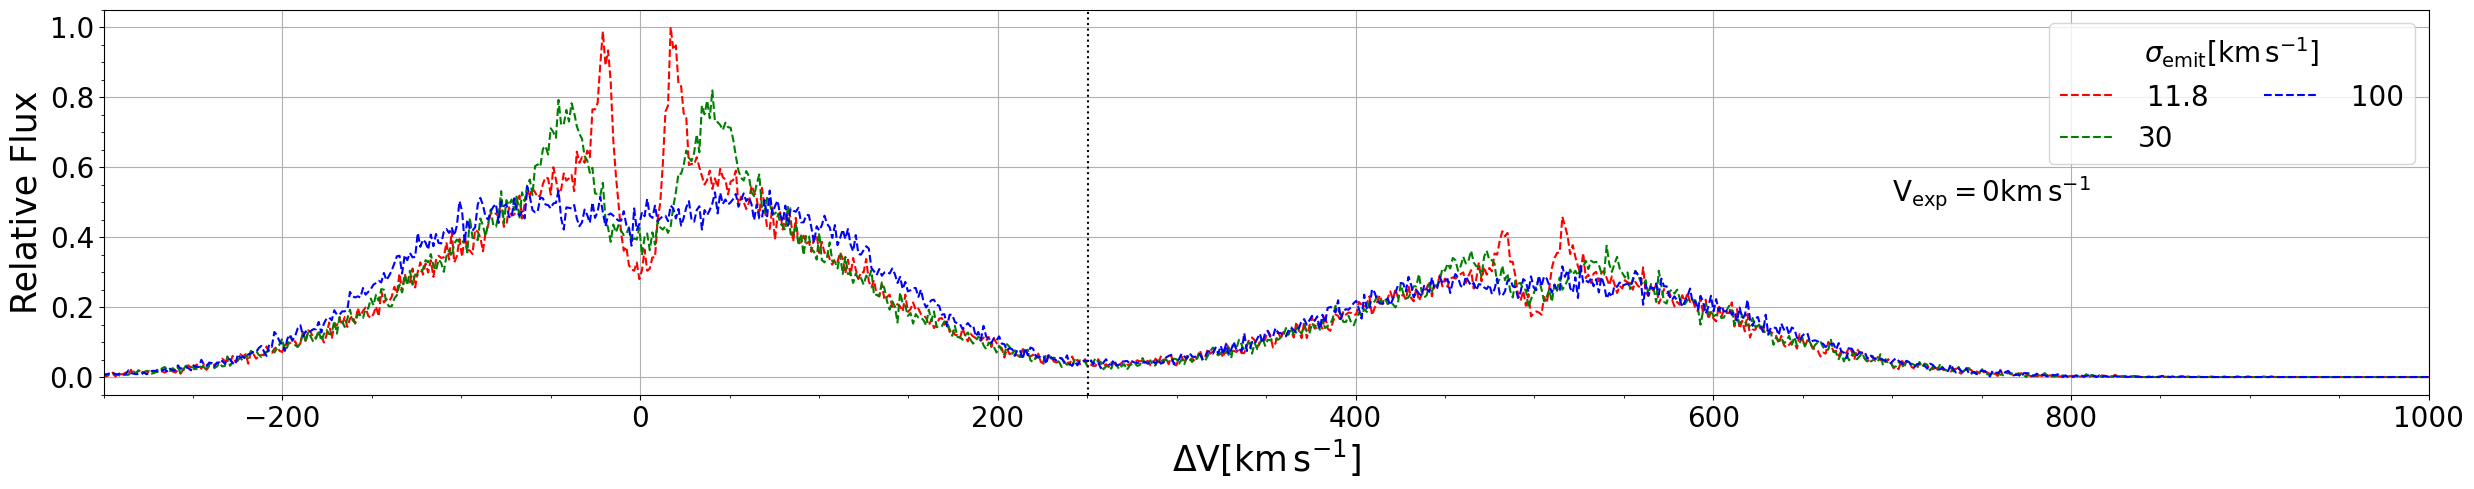

In [69]:
fig = plt.figure(1,figsize=(30,5))

# plt.subplot(121)
index, expand = 14,0
emit_n = 100
ran_v = 118
normal = max(globals()[f'I_K_f_{ran_v}_{index}_{expand}_{emit_n}'])
# normal = 1
plt.plot(globals()[f'I_K_dv_{ran_v}_{index}_{expand}_{emit_n}'] ,globals()[f'I_K_f_{ran_v}_{index}_{expand}_{emit_n}']/normal,'r--',label=f' {ran_v/10}')
plt.plot(globals()[f'I_H_dv_{ran_v}_{index}_{expand}_{emit_n}'],globals()[f'I_H_f_{ran_v}_{index}_{expand}_{emit_n}']/normal,'r--')

ran_v = 30
plt.plot(globals()[f'I_K_dv_{ran_v}_{index}_{expand}_{emit_n}'] ,globals()[f'I_K_f_{ran_v}_{index}_{expand}_{emit_n}']/ normal ,'g--',label=f'{ran_v}')
plt.plot(globals()[f'I_H_dv_{ran_v}_{index}_{expand}_{emit_n}'],globals()[f'I_H_f_{ran_v}_{index}_{expand}_{emit_n}']/ normal,'g--')

ran_v  =100
plt.plot(globals()[f'I_K_dv_{ran_v}_{index}_{expand}_{emit_n}'] ,globals()[f'I_K_f_{ran_v}_{index}_{expand}_{emit_n}']/ normal,'b--',label=f' {ran_v}')
plt.plot(globals()[f'I_H_dv_{ran_v}_{index}_{expand}_{emit_n}'] ,globals()[f'I_H_f_{ran_v}_{index}_{expand}_{emit_n}']/ normal,'b--')



vv = ((C_IV_H_wo/C_IV_K_wo-1)*cc_k /2)
plt.axvline(vv ,ymin=0,ymax=10,color='k',linestyle=':')
plt.xlim(-300, 1000)
plt.minorticks_on()
# plt.xlim(-1500,1500)
plt.grid(True)
plt.legend(loc='upper right',fontsize=20,ncol=2,title=r'$\sigma_{{\rm emit}} [\rm km \, s^{{-1}} ]$',title_fontsize=20)
plt.xlabel(r'$\Delta \rm V [\rm km \, s^{-1}]$',fontsize=25)
plt.ylabel(r'Relative Flux',fontsize=25)
plt.text(700,0.5,f'$\\rm V_{{\\rm exp}} = {expand} \\rm km \\, s^{{-1}}$',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.savefig(r'/home/jin/바탕화면/vexp.pdf',bbox_inches='tight')